<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors. 
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [2]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

# Make 1000 samples 
N_SAMPLES = 1000

# Create circles
x, y = make_moons(N_SAMPLES, noise=0.03, random_state=RANDOM_SEED)  

In [3]:
print(f"First 5 X features:\n{x[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[-0.00933187  0.39098105]
 [ 0.95457387 -0.47375583]
 [ 0.9185256  -0.42519648]
 [ 0.41276802 -0.37638459]
 [-0.84532016  0.52879908]]

First 5 y labels:
[1 1 1 1 0]


In [4]:
# Turn data into a DataFrame
import pandas as pd

moon_data_pd = pd.DataFrame({"X1": x[:, 0],
    "X2": x[:, 1],
    "label": y
})

In [5]:
moon_data_pd.head(5)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


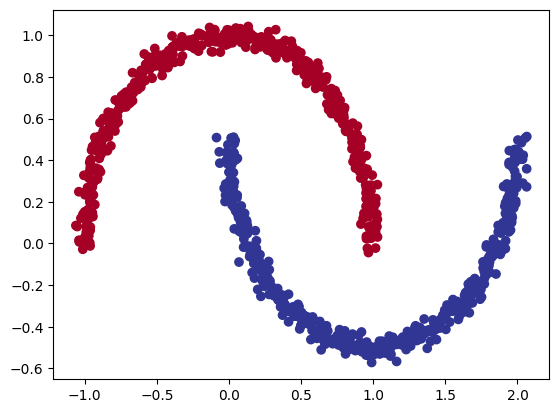

In [6]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

plt.scatter(x=x[:, 0], 
            y=x[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu); 

# See: colormaps
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [7]:
# Turn data into tensors of dtype float
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [8]:
x[:5], y[:5]

(tensor([[-0.0093,  0.3910],
         [ 0.9546, -0.4738],
         [ 0.9185, -0.4252],
         [ 0.4128, -0.3764],
         [-0.8453,  0.5288]]),
 tensor([1., 1., 1., 1., 0.]))

In [9]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED
)

In [10]:
x_train[:5], y_train[:5]

(tensor([[ 1.9758,  0.2076],
         [-0.9608,  0.4007],
         [-0.0986,  1.0231],
         [-0.1083,  0.9919],
         [ 0.3767, -0.2620]]),
 tensor([1., 0., 0., 0., 1.]))

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

__[Annotation] Activation functions:__  
https://pytorch.org/docs/stable/generated/torch.nn.Softplus.html#torch.nn.Softplus

This has a _large_ effect on the convergence of the model. Some activation functions will NOT converge to high accuracy. Said behaviour depends as well on the data being modelled. Certain functions adapt better for certain data, etc. Therefore, the activation function represents a meta-parameter.

In [11]:
import torch
from torch import nn

# Inherit from nn.Module to make a model capable of fitting the mooon data

IN_NODES = 8

class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self):
        super().__init__() 
        self.layer_1 = nn.Linear(in_features=2, out_features=IN_NODES)  # input, x/y pairs
        self.layer_2 = nn.Linear(in_features=IN_NODES, out_features=IN_NODES)  # hidden / middle
        self.layer_3 = nn.Linear(in_features=IN_NODES, out_features=1) # output, one options
        self.relu = nn.GELU() # ReLU, SiLU, GELU, Softplus

        # NOTE: choice of activation has STRONG effect on convergence of model. 
        #       need to test to see which provides best behaviour
    
    def forward(self, x):
        ## Your code here ##
        nest_0 = self.layer_1(x)
        nest_1 = self.layer_2( self.relu(nest_0) )
        nest_2 = self.layer_3( self.relu(nest_1) )
        return nest_2

# Instantiate the model
## Your code here ##
model_v0 = MoonModelV0().to(device)
print(model_v0)

MoonModelV0(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): GELU(approximate='none')
)


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [12]:
# Setup loss function
loss_function = nn.BCEWithLogitsLoss()

# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(model_v0.parameters(), lr=0.05)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuracy, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [13]:
# What's coming out of our model?
y_logits = model_v0(x_train.to(device))

In [14]:
# logits (raw outputs of model)
print("Logits:")
## Your code here ##
print( y_logits[:15] )

# Prediction probabilities
print("Pred probs:")
## Your code here ##

y_pred_probs = torch.softmax(y_logits, dim=1) 
print( y_pred_probs[:5] )

# Prediction labels
print("Pred labels:")
## Your code here ##
print( y_pred_probs[0] )
print( torch.argmax(y_pred_probs[0]) )

Logits:
tensor([[-0.2074],
        [-0.2453],
        [-0.2121],
        [-0.2115],
        [-0.1707],
        [-0.2139],
        [-0.1671],
        [-0.1833],
        [-0.1981],
        [-0.2495],
        [-0.1657],
        [-0.2063],
        [-0.2470],
        [-0.2010],
        [-0.1819]], grad_fn=<SliceBackward0>)
Pred probs:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SliceBackward0>)
Pred labels:
tensor([1.], grad_fn=<SelectBackward0>)
tensor(0)


In [15]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
#!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
accuracy_fn = Accuracy(task="multiclass", num_classes=2).to(device) 

In [16]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
EPOCHS = 6000

# Send data to the device
x_train = x_train.to(device)
y_train = y_train.to(device)

x_test = x_test.to(device)
y_test = y_test.to(device)

# Calculate accuracy (a classification metric)
#def accuracy_fn(y_true, y_pred):
#    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
#    acc = (correct / len(y_pred)) * 100 
#    return acc

# Loop through the data
for epoch in range(EPOCHS):
    ### Training
    model_v0.train()

    # 1. Forward pass (logits output)
    y_logits = model_v0(x_train).squeeze()

    # Turn logits into prediction probabilities
    y_pred = torch.round(torch.sigmoid(y_logits)) 

    # Turn prediction probabilities into prediction labels
  

    # 2. Calculaute the loss
    # loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs
    loss = loss_function(y_logits, y_train) 
 
    
    # Calculate the accuracy
    acc = accuracy_fn( y_pred, y_train.int() ) # the accuracy function needs to compare pred labels (not logits) with actual labels
    # acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Zero the gradients
    optimizer.zero_grad()

    # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
    loss.backward()
    
    # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression) 
    optimizer.step()

    ### Testing 
    model_v0.eval()
    
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_v0(x_test).squeeze()
        
        # Turn the test logits into prediction labels
        test_pred = torch.round( torch.sigmoid(test_logits) )
        
        # 2. Calculate test loss and accuracy
        test_loss = loss_function(test_logits, y_test)

        test_acc = accuracy_fn( test_pred, y_test.int() )
        
        #test_acc = accuracy_fn(y_true=y_test,
        #                     y_pred=test_pred)  
    
    # Print out what's happening every 100 epochs
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69104, Accuracy: 0.50% | Test Loss: 0.69044, Test Accuracy: 0.50%
Epoch: 200 | Loss: 0.35216, Accuracy: 0.83% | Test Loss: 0.37358, Test Accuracy: 0.81%
Epoch: 400 | Loss: 0.25270, Accuracy: 0.88% | Test Loss: 0.25276, Test Accuracy: 0.89%
Epoch: 600 | Loss: 0.24085, Accuracy: 0.89% | Test Loss: 0.23648, Test Accuracy: 0.90%
Epoch: 800 | Loss: 0.23509, Accuracy: 0.89% | Test Loss: 0.23071, Test Accuracy: 0.90%
Epoch: 1000 | Loss: 0.22514, Accuracy: 0.90% | Test Loss: 0.22154, Test Accuracy: 0.90%
Epoch: 1200 | Loss: 0.20476, Accuracy: 0.91% | Test Loss: 0.20224, Test Accuracy: 0.92%
Epoch: 1400 | Loss: 0.16698, Accuracy: 0.93% | Test Loss: 0.16570, Test Accuracy: 0.93%
Epoch: 1600 | Loss: 0.11641, Accuracy: 0.95% | Test Loss: 0.11550, Test Accuracy: 0.95%
Epoch: 1800 | Loss: 0.07292, Accuracy: 0.98% | Test Loss: 0.07159, Test Accuracy: 0.98%
Epoch: 2000 | Loss: 0.04561, Accuracy: 0.99% | Test Loss: 0.04414, Test Accuracy: 0.99%
Epoch: 2200 | Loss: 0.03006, Accuracy: 

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [17]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [18]:
# Plot decision boundaries for training and test sets
model_v0.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_v0(x_test))).squeeze()
    
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

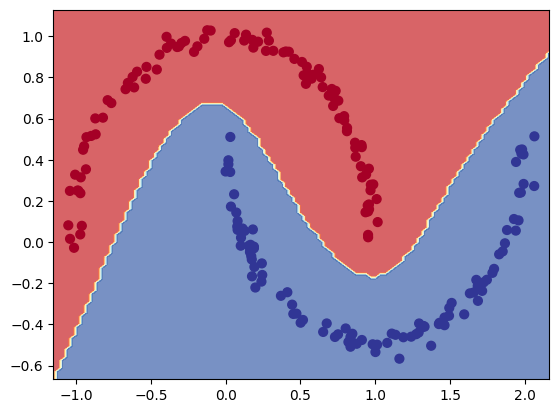

In [19]:
plot_decision_boundary(model_v0, x_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [20]:
# Create a straight line tensor
linspace_tensor = torch.arange(-10, 10, 1, dtype=torch.float32)

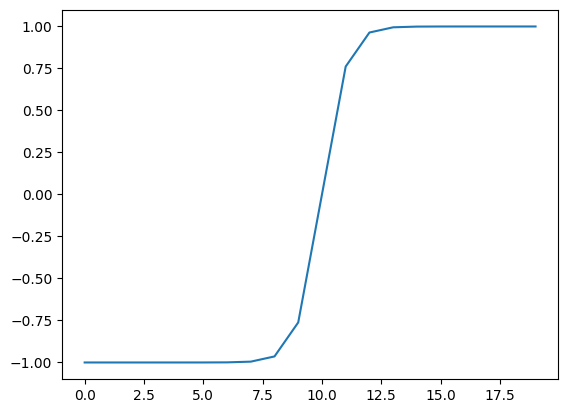

In [21]:
# Test torch.tanh() on the tensor and plot it
torch_tanh = torch.tanh(linspace_tensor)
    # plot
plt.plot(torch_tanh)

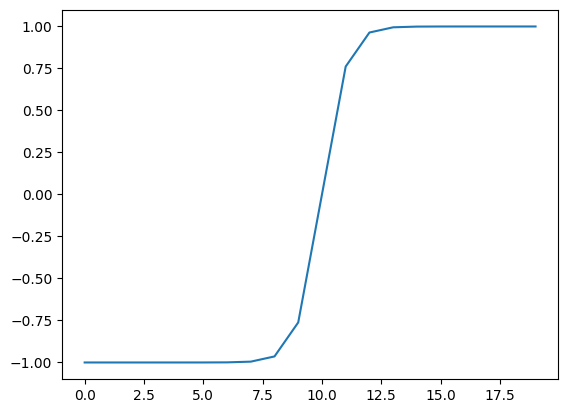

In [22]:
# Replicate torch.tanh() and plot it
def tanh_diy(x):
    exp_p = torch.exp(x)
    exp_n = torch.exp(-x)
    return ( exp_p - exp_n )/( exp_p + exp_n )

    # plot
func_tanh = tanh_diy( linspace_tensor )

plt.plot(func_tanh) 

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

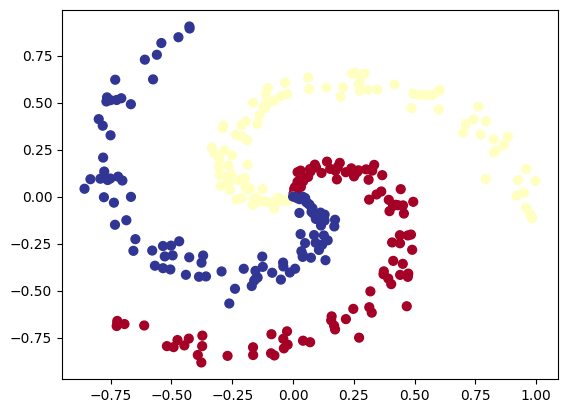

In [23]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(RANDOM_SEED)

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

Xref = np.zeros((N*K,D)) # data matrix (each row = single example)
Yref = np.zeros(N*K, dtype='uint8') # class labels

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  Xref[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  Yref[ix] = j

# lets visualize the data
plt.scatter(Xref[:, 0], Xref[:, 1], c=Yref, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [24]:
# Turn data into tensors
X2 = torch.from_numpy(Xref).type(torch.float) # features as float32
Y2 = torch.from_numpy(Yref).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, # keep data as tensor /works for array
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED
)

In [25]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [26]:
# Create model by subclassing nn.Module
class ModelMulti(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=4):
        super().__init__()
        
        self.linear_layer_stack = nn.Sequential( # sequence of layer functions
            nn.Linear(in_features=input_features, out_features=hidden_units),          
            nn.GELU(),
            # nn.ReLU(), # apply relu to layer    
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.GELU(),   # non-linear activation function
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

In [27]:
# Instantiate model and send it to device
    # constants
NUM_FEATURES = 2 # values to test | coordinates of points
NUM_CLASSES = 3 # number of elements to categorize

    # model
model_multi = ModelMulti( input_features=NUM_FEATURES,
                          output_features=NUM_CLASSES, 
                          hidden_units=8 ) # hyper-parameter
model_multi.to(device)

ModelMulti(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)

In [28]:
# Setup data to be device agnostic
X2_train = X2_train.to(device)
Y2_train = Y2_train.to(device)

X2_test = X2_test.to(device)
Y2_test = Y2_test.to(device)

In [29]:
# Print out first 10 untrained model outputs (forward pass)
ymulti_logits = model_multi(X2_train)

print("Logits:")
print( ymulti_logits[:10] )

print("Pred probs:")
ymulti_pred_probs = torch.softmax(ymulti_logits, dim=1) 
print( ymulti_pred_probs[:10] )

print("Pred labels:")
print( ymulti_pred_probs[0] )
print( torch.argmax(ymulti_pred_probs[0]) )

Logits:
tensor([[-0.0331, -0.2413, -0.0893],
        [-0.0455, -0.2362, -0.1024],
        [-0.0440, -0.2588, -0.1097],
        [-0.1274, -0.2742, -0.2330],
        [-0.1030, -0.2930, -0.2074],
        [-0.0661, -0.2652, -0.1419],
        [-0.0579, -0.2645, -0.1305],
        [-0.0062, -0.2416, -0.0568],
        [-0.0681, -0.2460, -0.1361],
        [-0.1288, -0.2748, -0.2353]], grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.3627, 0.2945, 0.3428],
        [0.3609, 0.2982, 0.3409],
        [0.3645, 0.2941, 0.3414],
        [0.3619, 0.3125, 0.3256],
        [0.3666, 0.3032, 0.3303],
        [0.3641, 0.2984, 0.3375],
        [0.3645, 0.2965, 0.3390],
        [0.3648, 0.2883, 0.3468],
        [0.3608, 0.3020, 0.3371],
        [0.3619, 0.3127, 0.3253]], grad_fn=<SliceBackward0>)
Pred labels:
tensor([0.3627, 0.2945, 0.3428], grad_fn=<SelectBackward0>)
tensor(0)


In [30]:
# Setup loss function and optimizer
loss_function_multi = nn.CrossEntropyLoss()

optimizer_multi = torch.optim.SGD( model_multi.parameters(), lr=0.2 )

# optional extension: use the Adam optimizer instead of SGD, 
# you may have to experiment with different values of the learning rate to get it working

In [31]:
# Let's calculuate the accuracy for when we fit our model
#!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_function_multi = Accuracy(task="multiclass", num_classes=NUM_CLASSES)
acc_function_multi = acc_function_multi.to(device)

In [32]:
# Build a training loop for the model
torch.manual_seed(RANDOM_SEED)

EPOCHS = 6000 # causes torchmark accuracy to decrease
EPOCHS = 1000

# Loop over data
for epoch in range(EPOCHS):
    
    ## Training
    model_multi.train()
    
    # 1. Forward pass
    y_logits = model_multi(X2_train) 
    
    # 2. Calculate the loss
    loss = loss_function_multi(y_logits, Y2_train) 

        # accuracy function
    y_pred = torch.round( torch.sigmoid(y_logits) )    # prediction func 
    
    acc = acc_function_multi( y_pred, Y2_train.int() ) # accuracy func depends on prediction
    
    # 3. Optimizer zero grad
    optimizer_multi.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step
    optimizer_multi.step()
    
    ## Testing
    model_multi.eval()
    
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_multi(X2_test)
        test_pred = torch.round( torch.sigmoid(test_logits) )
        
        # 2. Caculate loss and acc
        test_loss = loss_function_multi( test_logits, Y2_test )

        test_acc = acc_function_multi( test_pred, Y2_test.int() )
    
        # Print out what's happening every 100 epochs
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 


Epoch: 0 | Loss: 1.10084, Acc: 0.32% | Test Loss: 1.08561, Test Acc: 0.37%
Epoch: 200 | Loss: 0.78105, Acc: 0.54% | Test Loss: 0.76787, Test Acc: 0.53%
Epoch: 400 | Loss: 0.63247, Acc: 0.63% | Test Loss: 0.64335, Test Acc: 0.57%
Epoch: 600 | Loss: 0.33436, Acc: 0.76% | Test Loss: 0.33082, Test Acc: 0.67%
Epoch: 800 | Loss: 0.16309, Acc: 0.86% | Test Loss: 0.14084, Test Acc: 0.77%


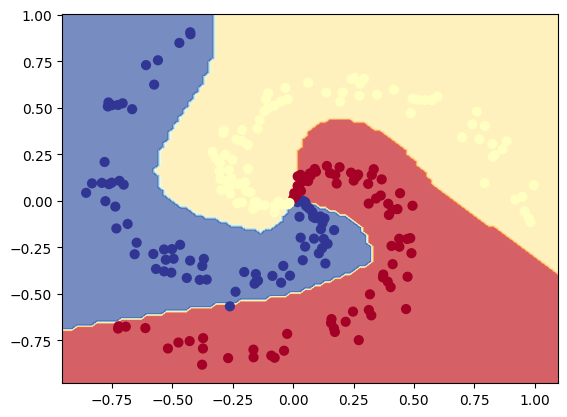

In [33]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_multi, X2_train, Y2_train)

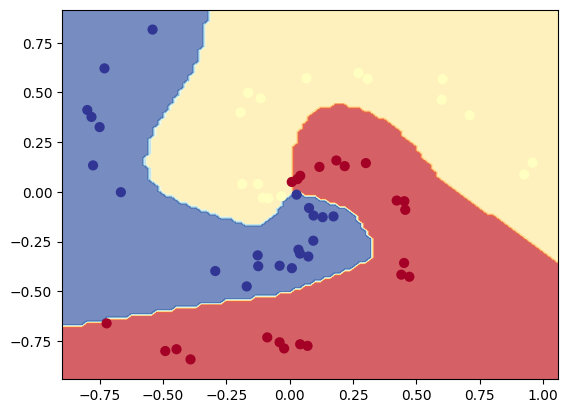

In [34]:
plot_decision_boundary(model_multi, X2_test, Y2_test)